# Comparing $B_c^+->J/\psi \mu^+ \bar{\nu}$ MC PV Branches  

In [23]:
%matplotlib inline
from skhep.visual import MplPlotter as skh_plt
import matplotlib.pyplot as plt
RunI_MC='/usera/delaney/private/DaVinci_DevX/DaVinciDev_v39r1p1/buggyBc2JpsiMuNu.root'
MC16='/r01/lhcb/delaney/gangadir/workspace/delaney/LocalXML/252/0/output/Bc2JpsiMuNu.root'

In [24]:
import uproot
runI = uproot.open(RunI_MC)['TupleBc2JpsiMuNu_Jpsi2MuMu/DecayTree']
mc16 = uproot.open(MC16)['TupleBc2JpsiMuNu_Jpsi2MuMu/DecayTree']

In [25]:
print 'validate sizes:\n'
print runI.numentries
print mc16.numentries

validate sizes:

1080
1362


In [27]:
allkeys=list(runI.keys())
interesting_branches=[]

for b in allkeys:
    if 'PV' in str(b):
        interesting_branches.append(b)

In [28]:
inbranches = runI.arrays(interesting_branches)
r2branches = mc16.arrays(interesting_branches)

In [41]:
import numpy as np

#remove jagged covariance arrays, so to have all 1D atrays
copyDF=inbranches.copy()
for key in copyDF:
    #remove covariance matrices
    if 'COV' in str(key):
        inbranches.pop(key)    
        r2branches.pop(key)
    #flatten jagged arrays
    if type(copyDF[key]) != np.ndarray:
        #inbranches[key]=inbranches[key].content
        #r2branches[key]=r2branches[key].content
        inbranches.pop(key)
        r2branches.pop(key)

In [8]:
Bpvchi2=runI.array('B_plus_PV_CHI2')
jpsiIPchi2=runI.array('Jpsi_IPCHI2_OWNPV')

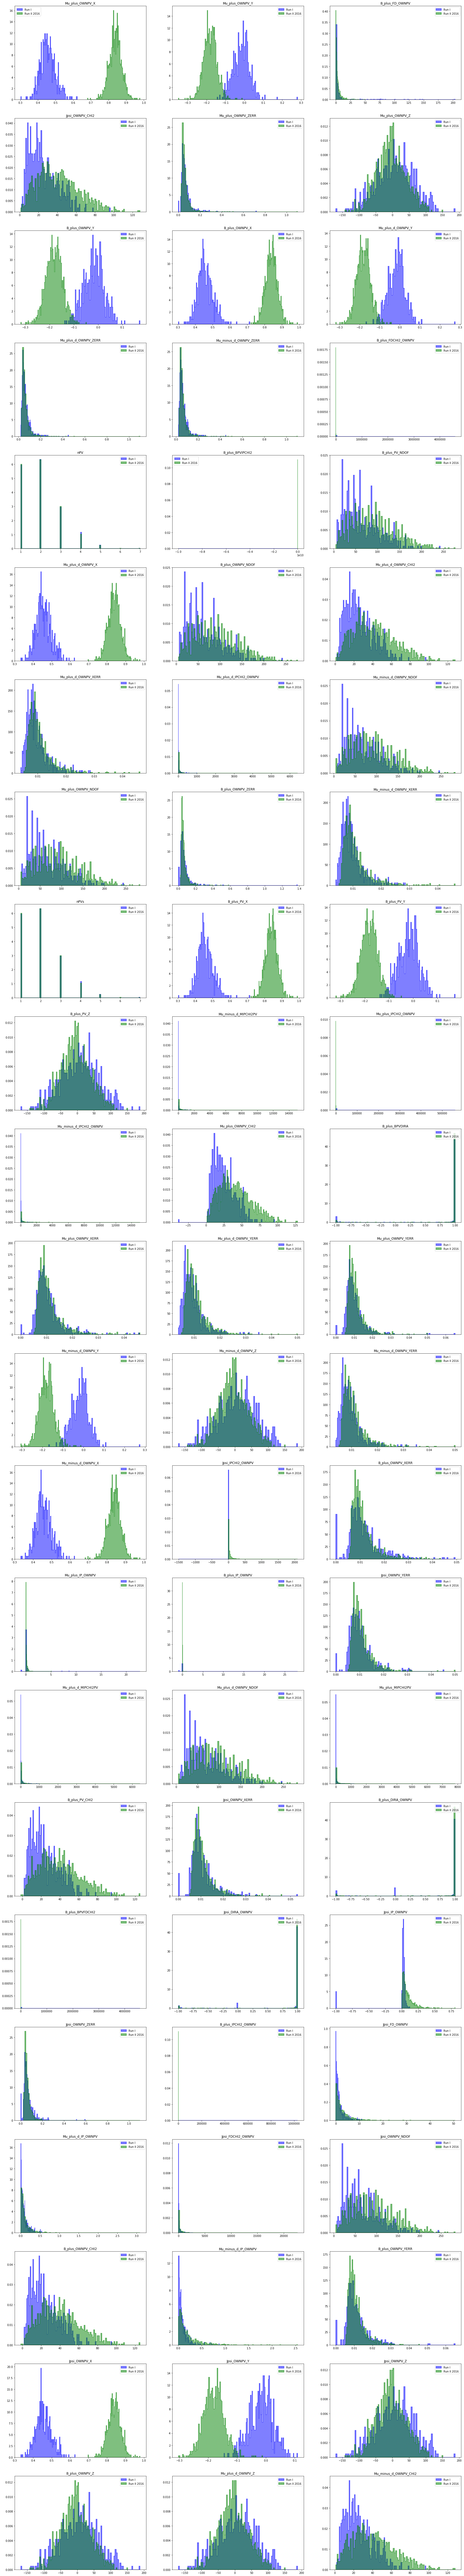

In [11]:
import matplotlib.pyplot as plt, mpld3
fig = plt.figure(figsize=(30,200))
i=0
for (key, value) in inbranches.items():
    try:   
        i+=1
        ax = fig.add_subplot(26,3, i)
        plt.title('%s'%key)
        
        #implement sanity cuts on Bpvchi2
        _ = skh_plt.hist(inbranches[key][([Bpvchi2>0] and [jpsiIPchi2<9.])],bins=100, normed=True, histtype='stepfilled', 
             alpha=.5, color='Blue', linewidth=2, edgecolor='Blue', label='Run I')
        _ = skh_plt.hist(r2branches[key],bins=100, normed=True, histtype='stepfilled', 
             alpha=.5, color='Green', linewidth=2, edgecolor='Green', label='Run II 2016')
        plt.legend()
    except:
        print('Something went wrong when plotting %s'%key)
        pass
    


In [12]:
mpld3.save_html(fig, 'Jpsi_MC_Comparison_cuts')

In [14]:
#skh_plt.hist(inbranches[b'B_plus_BPVIPCHI2'], normed=True)
inbranches[b'B_plus_BPVIPCHI2']

array([ 4.05532698e+00,  2.25837480e-01,  1.71617215e+01, ...,
        5.21306153e+00,  1.57736805e+00, -1.00000000e+10])

In [51]:
flat_branches=inbranches.keys()
r1=runI.pandas.df(flat_branches)

In [54]:
r1[r1.filter[regex='CHI2']<9.0]

NameError: name 'regex' is not defined

In [39]:
r1['B_plus_OWNPV_COV_[0][0]']

entry  subentry
0      0           0.000066
1      0           0.000048
       1                NaN
       2                NaN
       3                NaN
2      0           0.002116
       1                NaN
3      0           0.000125
       1                NaN
4      0           0.000100
       1                NaN
5      0           0.000037
6      0           0.000296
       1                NaN
7      0           0.000117
       1                NaN
8      0           0.000132
       1                NaN
9      0           0.000557
10     0           0.000009
       1                NaN
       2                NaN
11     0           0.000053
12     0           0.000515
       1                NaN
13     0           0.000172
14     0           0.000159
       1                NaN
       2                NaN
       3                NaN
                     ...   
1062   0           0.001005
       1                NaN
       2                NaN
1063   0           0.000071
1064